In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

In [2]:
df1 = pd.read_csv(r"C:\\Users\\Oasis\\Desktop\\Advertising.csv")

In [3]:
df1.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df1.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
df1.shape

(200, 5)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df1.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df1.duplicated().sum()

0

In [9]:
df1.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<AxesSubplot:xlabel='TV'>

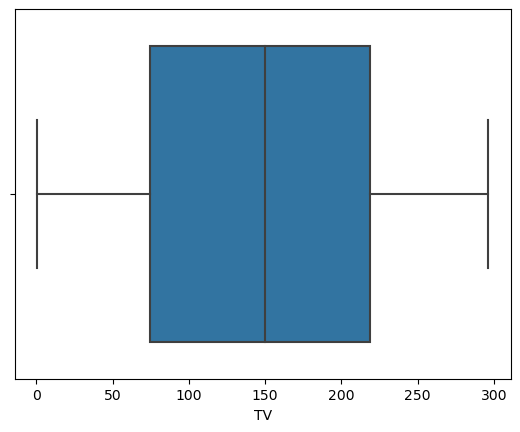

In [10]:
sns.boxplot(x="TV", data = df1)

<AxesSubplot:xlabel='Radio'>

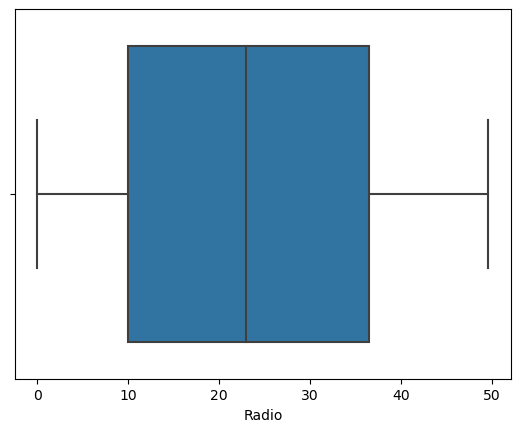

In [11]:
sns.boxplot(x="Radio", data = df1)

<AxesSubplot:xlabel='Newspaper'>

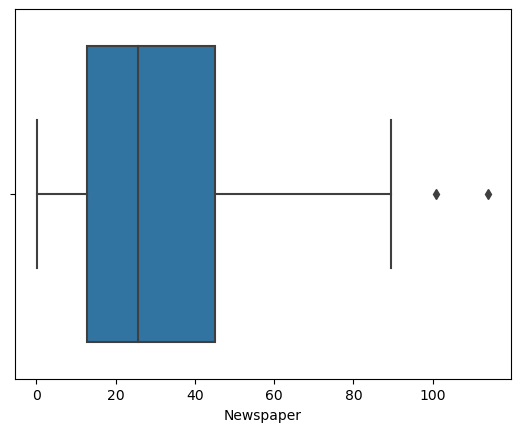

In [13]:
sns.boxplot(x="Newspaper", data = df1)

In [14]:
q1 = df1.Newspaper.quantile(0.25)
q2 = df1.Newspaper.quantile(0.75)
q1, q2

(12.75, 45.1)

In [15]:
IQR = q2 - q1
IQR

32.35

In [16]:
lower_limit = q1 - 1.5*IQR
upper_limit= q2 + 1.5*IQR
lower_limit, upper_limit

(-35.775000000000006, 93.625)

In [17]:
df1[(df1["Newspaper"]<lower_limit)|(df1["Newspaper"]>upper_limit)]

,Unnamed: 0,TV,Radio,Newspaper,Sales
16,17,67.8,36.6,114.0,12.5
101,102,296.4,36.3,100.9,23.8


In [18]:
df2 = df1[df1["Newspaper"]<upper_limit]

In [19]:
df2.head(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


<AxesSubplot:xlabel='Newspaper'>

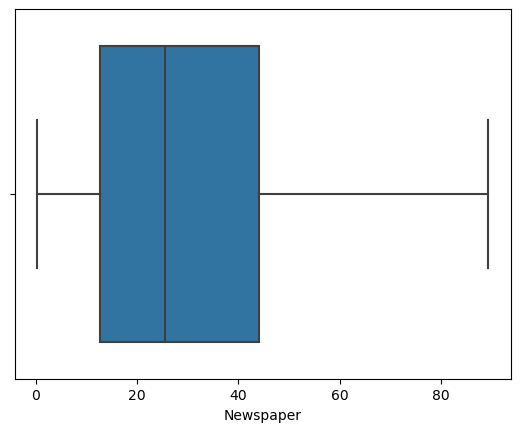

In [20]:
sns.boxplot(x= "Newspaper", data=df2)

In [40]:
df3 = df2.drop(["Sales"], axis = 1)
df3

,Unnamed: 0,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [41]:
x = df3.drop(["Unnamed: 0"], axis = 1)
x.head(6)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0


In [42]:
y = df2["Sales"]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 198, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.20, random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train,Y_train)
model.score(X_test, Y_test)

0.9098946359000558

In [47]:
y_prediction = model.predict(X_test)
y_prediction

array([14.01074388,  7.32660883, 16.91029923, 12.10494494, 10.32680801,
       15.800589  , 12.86917345, 14.46182171, 10.88622651, 16.12070585,
       22.89188978,  4.44772138, 14.47452338, 15.16779294, 13.08219004,
       11.93756336,  7.38163825, 11.34017618,  9.97074394, 17.25257133,
       20.92597453,  9.48506413,  8.89608111, 12.37384205,  9.35819552,
       16.12716079, 12.20096627, 20.59655504, 21.36951517, 15.07208869,
       23.2153892 , 20.87809592,  9.72208672, 24.06696712, 16.36688684,
        7.97869287, 21.91262979, 13.29393385, 11.82322424,  9.07954633])

In [48]:
X_test

,TV,Radio,Newspaper
19,147.3,23.9,19.1
170,50.0,11.6,18.4
64,131.1,42.8,28.9
177,170.2,7.8,35.2
72,26.8,33.0,19.3
87,110.7,40.6,63.2
5,8.7,48.9,75.0
120,141.3,26.8,46.2
12,23.8,35.1,65.9
152,197.6,23.3,14.2


In [49]:
Y_test

19     14.6
170     8.4
64     18.0
177    11.7
72      8.8
87     16.0
5       7.2
120    15.5
12      9.2
152    16.6
61     24.2
76      6.9
165    11.9
97     15.5
115    12.6
7      13.2
34      9.5
136     9.5
38     10.1
168    17.1
111    21.8
145    10.3
46     10.6
159    12.9
140    10.9
113    15.9
179    12.6
185    22.6
93     22.2
45     14.9
17     24.4
137    20.8
138     9.6
98     25.4
23     15.5
196     9.7
128    24.7
4      12.9
67     13.4
125    10.6
Name: Sales, dtype: float64

In [50]:
a = np.array(Y_test)
predicted = np.array(y_prediction)
df3 = pd.DataFrame({"original":a,"Predict":predicted},index=range(len(a)))
df3

,original,Predict
0,14.6,14.010744
1,8.4,7.326609
2,18.0,16.910299
3,11.7,12.104945
4,8.8,10.326808
5,16.0,15.800589
6,7.2,12.869173
7,15.5,14.461822
8,9.2,10.886227
9,16.6,16.120706


In [51]:
def predict_sale(TV,Radio,Newspaper):
    list1 = [TV, Radio, Newspaper]
    return model.predict([list1])

In [52]:
predict_sale(17.2,100, 9.3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22.46319076])

In [ ]:
predict_sale(8.7,48.9,75.0)